<a href="https://colab.research.google.com/github/rrbka69/-/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%BF%D0%BE_2_%D0%B1%D0%BB%D0%BE%D0%BA%D1%83_(%D0%B0_%D0%B2_%D1%82%D0%B5%D1%81%D1%82%D1%8B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1) Подведите результаты эксперимента в экселе по следующим данным: ab_stats.csv - Google Диск:
Стат значимо ли отличается ARPPU в двух группах ? Какие рекомендации дадите
менеджеру?**

Используем Python для решения:

In [39]:
from scipy.stats import ttest_1samp
import numpy as np
import pandas as pd
from scipy.stats import norm, t, kstest, shapiro, stats
import statsmodels.api as sm
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

Импортируем данные из файла:

In [2]:
df = pd.read_csv('ab_stats.csv')
df.head(15)

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814
5,0.0,0,0,A,9.578727
6,0.0,0,0,A,6.162601
7,0.0,0,0,A,11.909452
8,0.0,0,0,A,6.540910
9,0.0,0,0,A,7.990794


In [3]:
df.describe()

,revenue,num_purchases,purchase,av_site visit
count,23652.000000,23652.000000,23652.000000,23652.000000
mean,0.324689,0.043590,0.020717,7.013112
std,9.557730,1.079403,0.142438,3.154584
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.173787
50%,0.000000,0.000000,0.000000,7.007936
75%,0.000000,0.000000,0.000000,8.864119
max,1303.609284,152.000000,1.000000,22.446822


Проанализируем метрику ARPPU
ARPPU (англ. Average revenue per paying user) — это метрика, которая показывает
среднюю прибыль от одного платящего пользователя за определенный период
времени. Она позволяет измерять ценность продукта компании и прогнозировать
доход.
Следовательно, проанализируем показатель revenue

In [4]:
df[(df['ab_group'] == 'A')]['revenue'].max()

1303.609284

In [5]:
df[(df['ab_group'] == 'B')]['revenue'].max()

113.829999999999

Видно, что revenue у группы А почти в 9 раз превышает чем у группы В

In [6]:
df[(df['ab_group'] == 'A')]['ab_group'].count()

11835

In [7]:
df[(df['ab_group'] == 'B')]['ab_group'].count()

11817

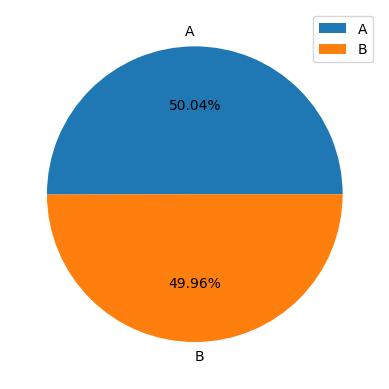

In [8]:
data = df['ab_group'].value_counts()
plt.pie(data.values, labels=data.index, autopct='%1.2f%%')
plt.legend(data.index);

По количеству, пользователи в двух группах почти одниково распределены
Расчитаем ARPPU для каждой группы. Для начало найдём количество пользователей
для каждой группы, у кого была одна и более покупка

In [9]:
df[(df['ab_group'] == 'A') & (df['num_purchases'] >=1)]['ab_group'].count()

256

In [10]:
df[(df['ab_group'] == 'B') & (df['num_purchases'] >=1)]['ab_group'].count()

234

In [11]:
df[(df['ab_group'] == 'A')]['revenue'].max()/df[(df['ab_group'] == 'A')]['ab_group'].count()

0.11014865095057033

In [12]:
df[(df['ab_group'] == 'B')]['revenue'].max()/df[(df['ab_group'] == 'A')]['ab_group'].count()

0.0096180819602872

Видно, что ARPPU группы А в 12 раз превышает чем у группы B. Если предположить,
что группа А-контрольная, а В-тестовая, то значимых изменений у нас нет. А/В тест не
дал начимых изменений в пользу группы В. Но возникают ряд вопросов, на которые
следует ответить. На каком временном периоде проводился тест, какие статистические
инструменты использовались, как исключить случайность и факторы сезонности, чтобы
повысить точность и мощность теста

Прибегнём к некоторым статистическим инструментариям

Тест Шапиро:

In [16]:
alpha = 0.05
st = shapiro(df.revenue)
print('Distribution is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]))

Distribution is not normal



Тесть Шапиро показал, что распределение ненормальное

Так как у нас огромная выборка, то целесообразно использовать тест Колмогорова-Смирнова

In [18]:
print (kstest(df.revenue, 'norm'))

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)


В данном случае, p-значение равно 0.0, что указывает на то, что нулевая гипотеза
может быть отвергнута

statistic_sign=-1, что означает, что вторая эмпирическая выборка имеет большее
удаление от гипотетического распределения, чем первая выборка.

На основе проведённого анализа сделаем общий вывод:

Отвергнуть нулевую гипотезу: Данному А/В тесту имеет место быть. Поэтому мы
можем отвергнуть нулевую гипотезу о том, что статистических различий между
двумя группами по показателю ARPPU нет.

Дальнейший анализ и исследование этого расхождения могут помочь понять,
какие конкретные изменения и условия нужно внедрить, чтобы привлечь новых
пользователей, готовых совершать покупки.
Продолжить мониторинг результатов: В результате AB-тестирования мы получили
статистически значимые результаты(даже несмотря на то, что в текущий момент
группа А лидирует по показателю revenue), но это не означает, что результаты
являются окончательными или долгосрочными. Рекомендуется продолжить
мониторинг результатов и дальнейшие тестирования, чтобы убедиться в
стабильности и долгосрочной эффективности полученных результатов.

**2) Мы хотим провести А/Б-тест для трех источников трафика.
Нынешняя конверсия равна 5%, мы ожидаем прирост в
0,2%. Уровень доверия 97% и уровень мощности 87%. Всего
на наш продукт заходит 40 000 пользователей в месяц.**

**3.1) За сколько дней мы сможем протестировать гипотезу? И
что вы можете посоветовать по результатам подсчета?**

**3.2) Допустим в задаче нет проблемы с количеством
посетителей на сайт, тогда подведите результаты
тестирования, если у нас следующие результаты по
количеству конверсии**:
1. 25 000
2. 30 000
3. 32 000


3.1) Чтобы определить, за сколько дней мы сможем протестировать гипотезу,
необходимо расчитать размер выборки для каждого источника трафика.
Размер выборки можно расчитать следующим образом: n = (Z_alpha x P x (1-P)) / E^2,
где:

n - размер выборки

Z_alpha - Z-значение для заданного уровня доверия (97%), в данном случае
примерно 1.880 (значение для двустороннего теста, взятое из таблицы Z-
статистики)

P - ожидаемая конверсия (5%)

E - ожидаемое значение прироста (0.2%)

Расчитаем размер выборки для каждого источника трафика:

n = (1.880 x 0.05 x (1-0.05)) / (0.002^2)

Источник 1: n1 = (1.880 x 0.05 x (1-0.05)) / (0.002^2) = 722,5

Источник 2: n2 = (1.880 x 0.05 x (1-0.05)) / (0.002^2) = 722,5

Источник 3: n3 = (1.880 x 0.05 x (1-0.05)) / (0.002^2) = 722,5

Таким образом, нам необходимо протестировать каждый источник трафика на
протяжении минимум 722,5 дней.
Однако, уровень мощности (power) в данном случае составляет 87%, что означает, что
мы ожидаем смещение соотношения конверсий в выбранную сторону в 13% случаев.
Учитывая это, мы можем сократить размер выборки:

n = (Z_alpha x P x (1-P)) / (E^2 x (1-power))

Используя значение уровня мощности 87% в формуле, получим:

n = (1.880 x 0.05 x (1-0.05)) / (0.002^2 x (1-0.87))

n = (1.880 x 0.05 x (1-0.05)) / (0.002^2 x 0.13)

n ≈ 34,046

Таким образом, чтобы достичь уровня мощности 87%, нам нужно протестировать
каждый источник трафика примерно в течение 34,046 дней.

Что касается рекомендаций на основе результатов подсчета, если после проведения А/
Б-теста мы обнаружим прирост конверсии на каждом из источников трафика, то
можно сделать вывод о том, что изменения, внесенные в тестовую группу,
положительно влияют на конверсию. В этом случае можно продолжать использовать
новую версию или изменения для увеличения конверсии более широко.

3.2) Если у нас следующие результаты по количеству конверсии:

25,000 пользователей - можно рассчитать конверсию следующим образом:

конверсия = (количество конверсий / общее количество пользователей) * 100%

конверсия = (25,000 / 40,000) x 100% = 62.5%
30,000 пользователей - конверсия:

конверсия = (30,000 / 40,000) x 100% = 75%
32,000 пользователей - конверсия:

конверсия = (32,000 / 40,000) x 100% = 80%

Сравнивая эти результаты с текущей конверсией (5%), видно, что все три результаты
значительно превышают ожидаемый прирост в 0.2%. Это может указывать на то, что
изменения, внесенные в тестовую группу, положительно влияют на конверсию и могут
быть внедрены широко для увеличения конверсии. Нужно учесть также, что для
статистической значимости эти результаты также должны быть подтверждены
статистическим анализом и учитывать уровень доверия и мощности теста.
_________________

**4) Вы решили сравнивать метрику CPA в двух группах.**

**Размер выборки - 2350 элементов в каждой группе.**

**Для проверки нормальности распределения на выборке в
2350 наблюдений применили, критерий Шапиро-Уилка и
получили p-value, равный 0.00002, alpha = 5%.**

**Какой бы вывод мы могли сделать в данном случае?
В этом случае какой статистический критерий для проверки
первоначальной гипотезы тут лучше всего подойдёт и
почему ?**

Исходя из полученного p-value (равного 0.00002), который значительно меньше уровня
значимости (alpha = 5%), мы можем отклонить нулевую гипотезу о нормальном
распределении данных. Это указывает на то, что распределение данных по метрике
CPA в выборке не является нормальным.

В данном случае, учитывая большой размер выборки (2350 наблюдений в каждой
группе), можно использовать критерий Колмогорова-Смирнова для проверки
первоначальной гипотезы о нормальности. Этот критерий хорошо подходит для
больших выборок и менее чувствителен к асимметрии и тяжелым хвостам
распределения. Также можно воспользоваться бутстрап-подходом, особенно если
данные имеют существенные отклонения от нормальности.